In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
wine = pd.read_csv('WineQT.csv')

In [31]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [32]:
wine.shape

(1143, 13)

In [33]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [28]:
#UNIVARIATE ANALYSIS
# Numerical Variables
numerical_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']


--- fixed acidity ---
Mean: 8.311111111111112
Median: 7.9
Standard Deviation: 1.74759501716954
Min: 4.6
Max: 15.9


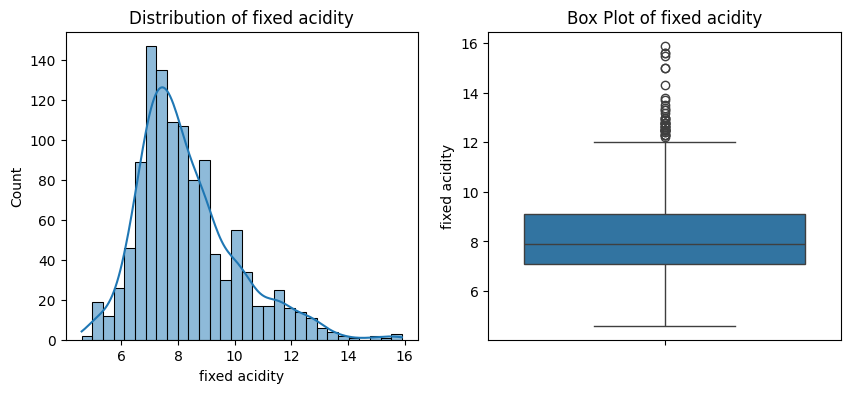


--- volatile acidity ---
Mean: 0.5313385826771653
Median: 0.52
Standard Deviation: 0.1796331930225245
Min: 0.12
Max: 1.58


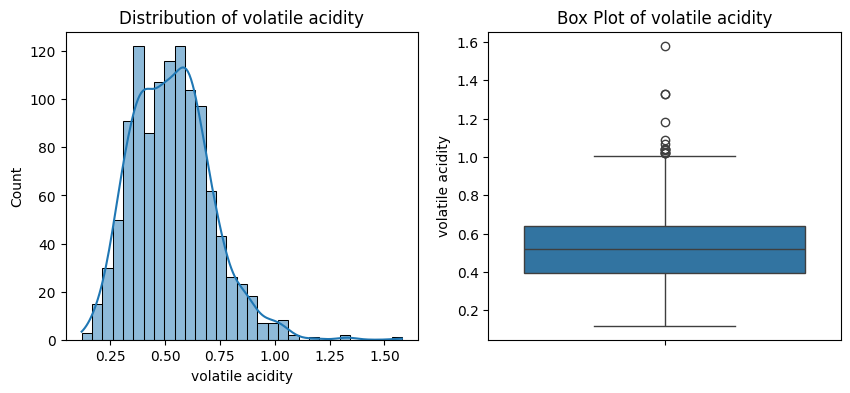


--- citric acid ---
Mean: 0.2683639545056868
Median: 0.25
Standard Deviation: 0.19668585234821898
Min: 0.0
Max: 1.0


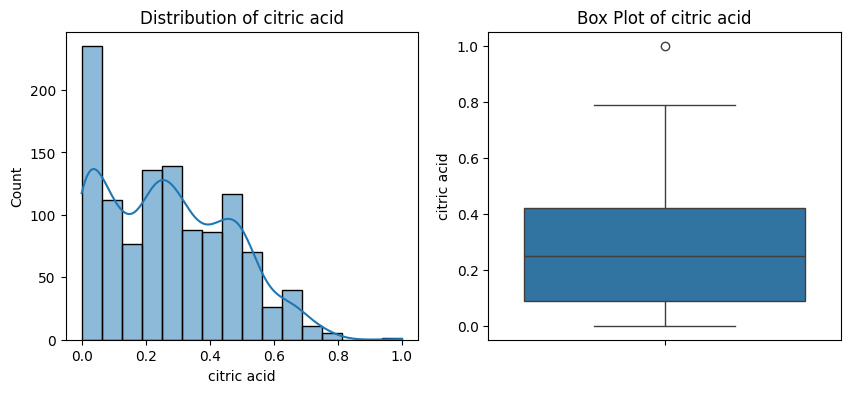


--- residual sugar ---
Mean: 2.5321522309711284
Median: 2.2
Standard Deviation: 1.3559174666826799
Min: 0.9
Max: 15.5


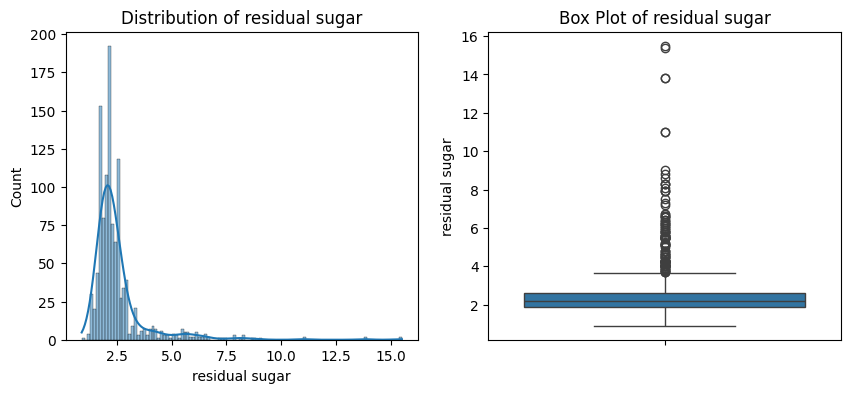


--- chlorides ---
Mean: 0.08693263342082239
Median: 0.079
Standard Deviation: 0.04726733795238057
Min: 0.012
Max: 0.611


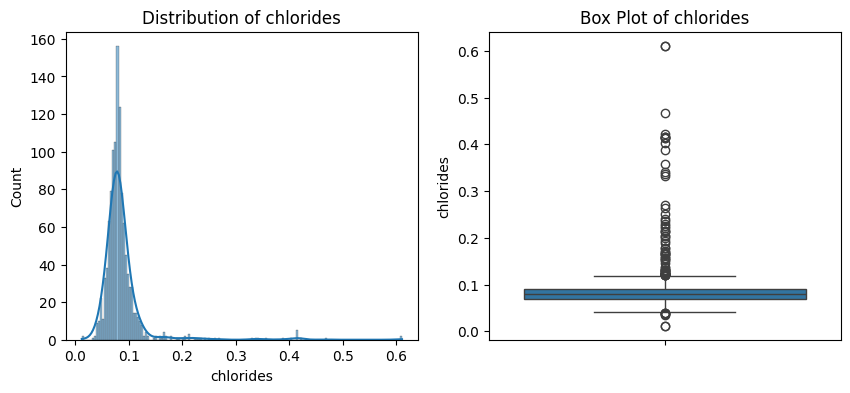


--- free sulfur dioxide ---
Mean: 15.615485564304462
Median: 13.0
Standard Deviation: 10.250486123430822
Min: 1.0
Max: 68.0


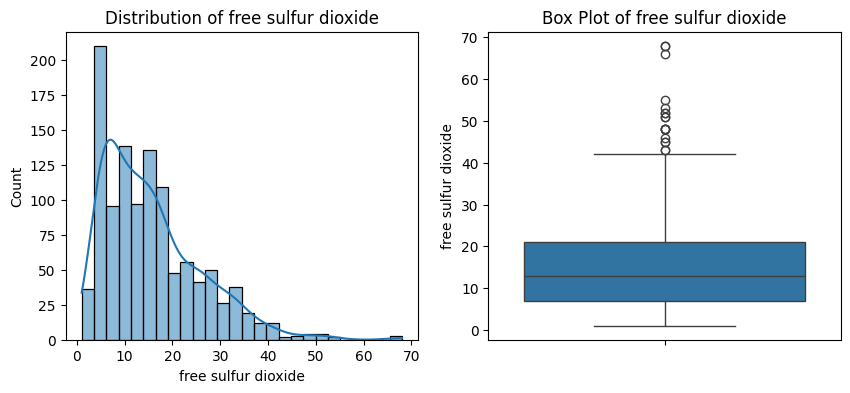


--- total sulfur dioxide ---
Mean: 45.91469816272966
Median: 37.0
Standard Deviation: 32.78213030734311
Min: 6.0
Max: 289.0


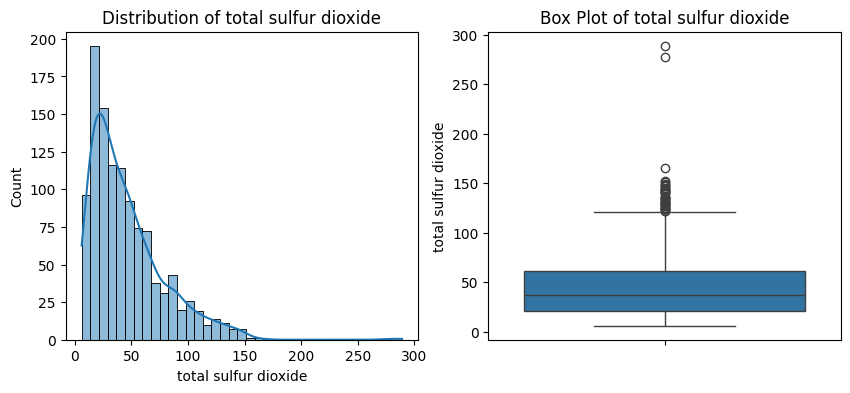


--- density ---
Mean: 0.9967304111986001
Median: 0.99668
Standard Deviation: 0.0019250671302545696
Min: 0.99007
Max: 1.00369


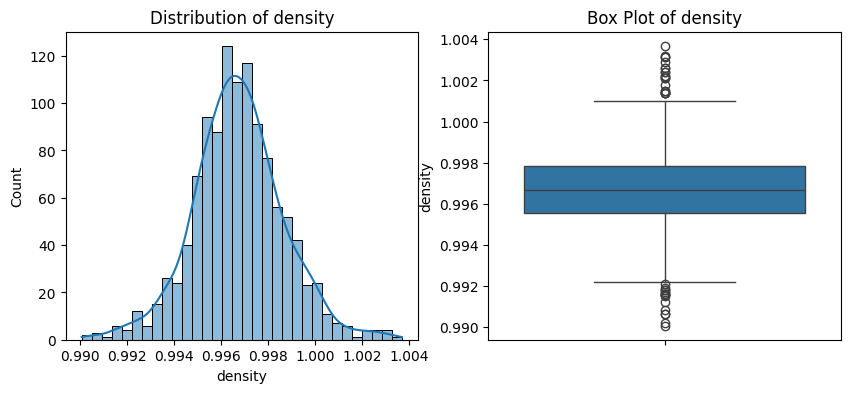


--- pH ---
Mean: 3.3110148731408575
Median: 3.31
Standard Deviation: 0.15666405977275194
Min: 2.74
Max: 4.01


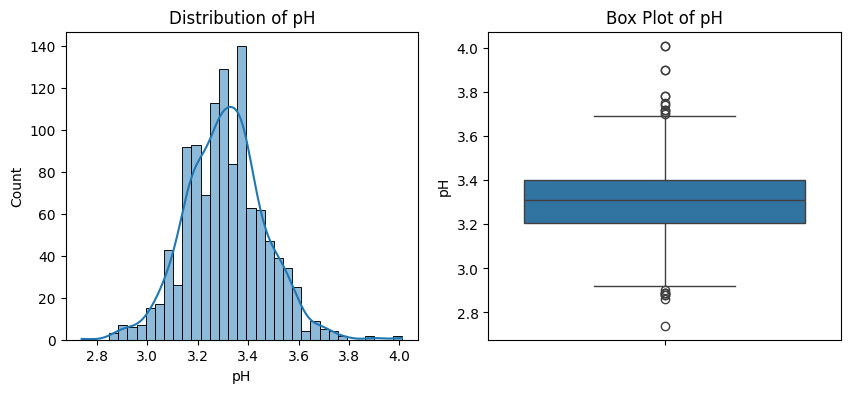


--- sulphates ---
Mean: 0.6577077865266842
Median: 0.62
Standard Deviation: 0.1703987144670741
Min: 0.33
Max: 2.0


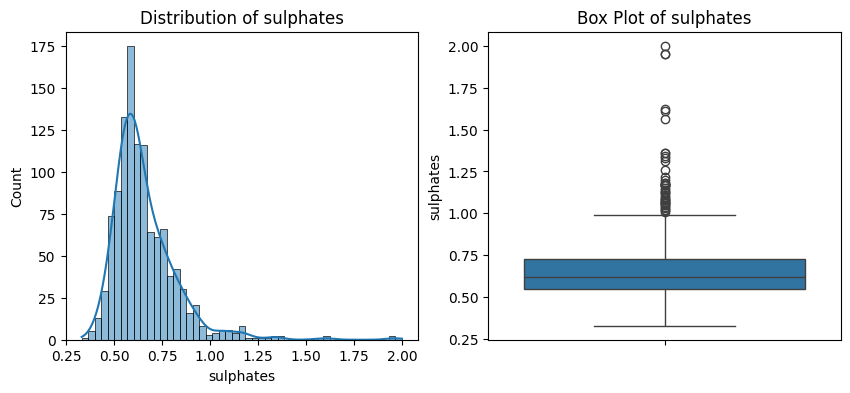


--- alcohol ---
Mean: 10.442111402741325
Median: 10.2
Standard Deviation: 1.0821956098764445
Min: 8.4
Max: 14.9


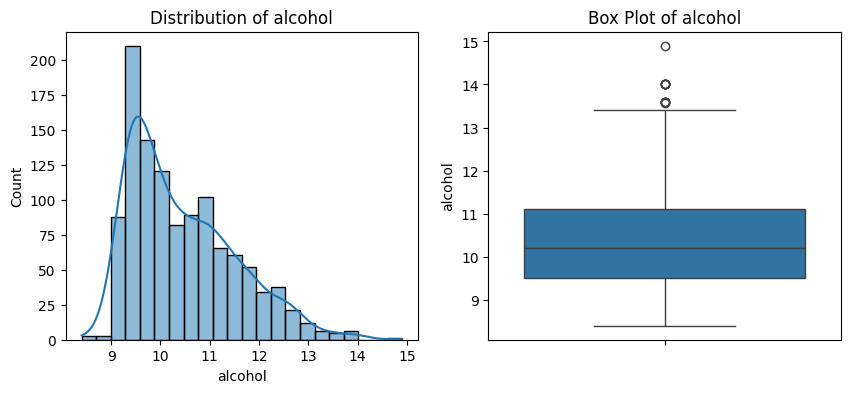

In [38]:

for var in numerical_vars:
    print(f"\n--- {var} ---")
    print(f"Mean: {wine[var].mean()}")
    print(f"Median: {wine[var].median()}")
    print(f"Standard Deviation: {wine[var].std()}")
    print(f"Min: {wine[var].min()}")
    print(f"Max: {wine[var].max()}")

    
# Histogram and Box Plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(wine[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.subplot(1, 2, 2)
    sns.boxplot(y=wine[var])
    plt.title(f"Box Plot of {var}")
    plt.show()




--- Quality ---
quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: proportion, dtype: float64


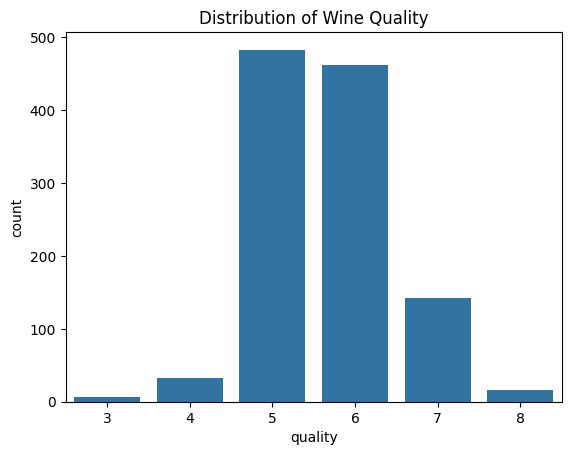

In [39]:
# Categorical Variable (Quality) - Treat as categorical for univariate analysis
print("\n--- Quality ---")
print(wine['quality'].value_counts(normalize=True))
sns.countplot(x=wine['quality'])
plt.title("Distribution of Wine Quality")
plt.show()

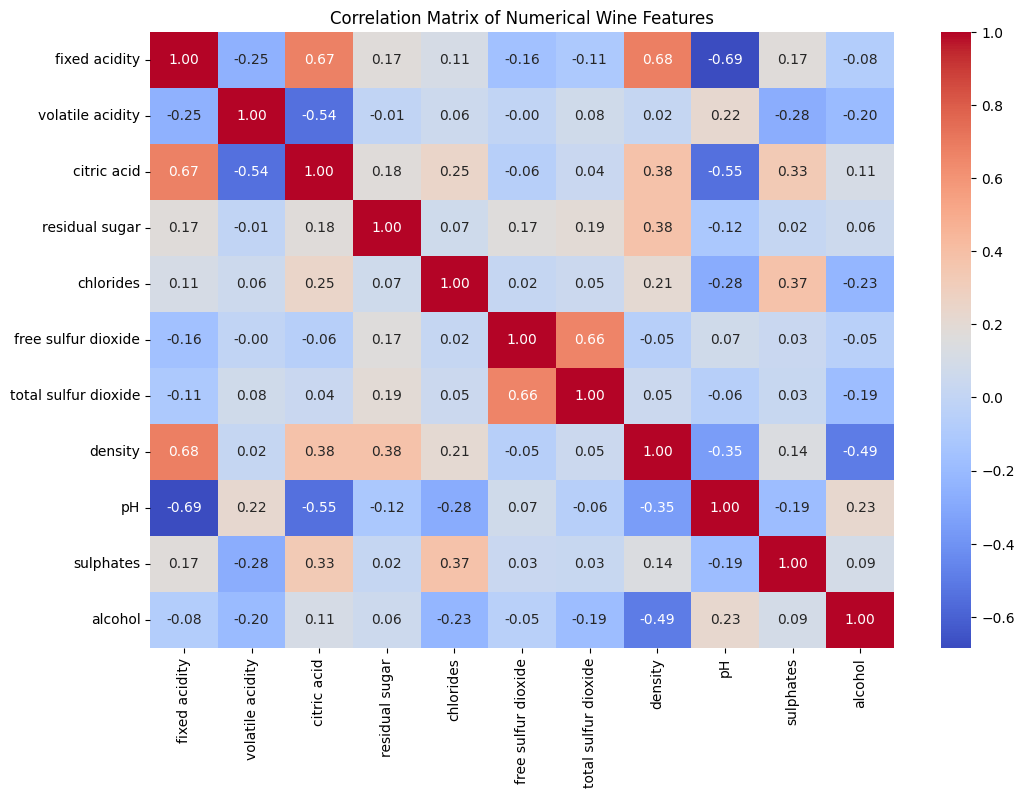

In [40]:
# Multivariate Analysis

# Correlation Matrix for Numerical Variables
correlation_matrix = wine[numerical_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Wine Features")
plt.show()


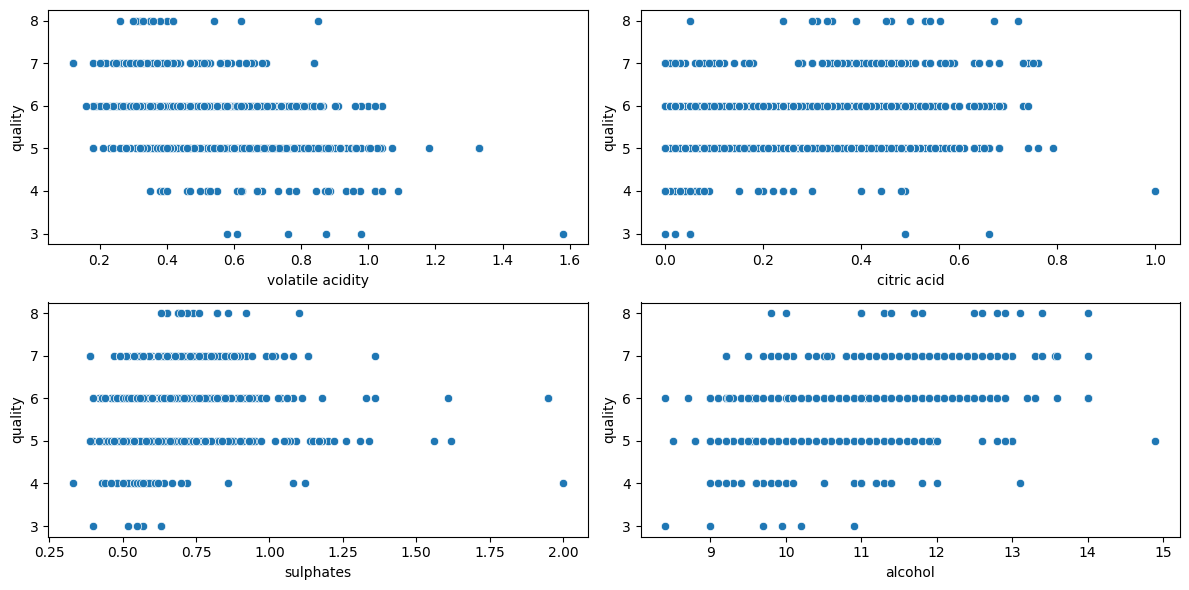

In [41]:

# Scatter Plots of Key Variables vs. Quality
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.scatterplot(x = 'volatile acidity', y = 'quality', data = wine)
plt.subplot(2,2,2)
sns.scatterplot(x = 'citric acid', y = 'quality', data = wine)
plt.subplot(2,2,3)
sns.scatterplot(x = 'sulphates', y = 'quality', data = wine)
plt.subplot(2,2,4)
sns.scatterplot(x = 'alcohol', y = 'quality', data = wine)
plt.tight_layout()

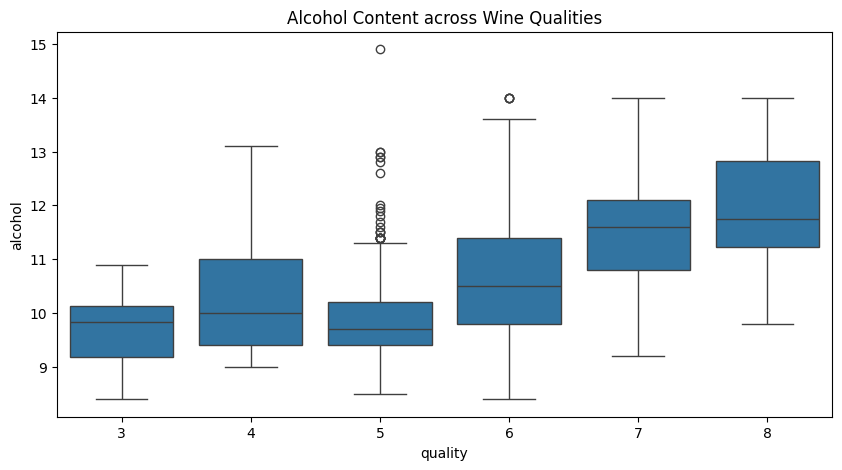

In [42]:


# Box Plots of Quality vs. Key Numerical Features (for relationship insight)
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='alcohol', data=wine) 
plt.title("Alcohol Content across Wine Qualities")
plt.show()

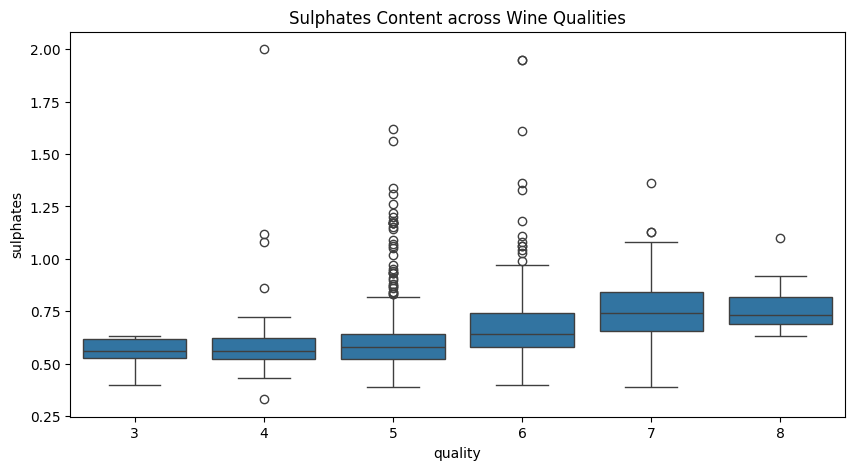

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='sulphates', data=wine) 
plt.title("Sulphates Content across Wine Qualities")
plt.show()

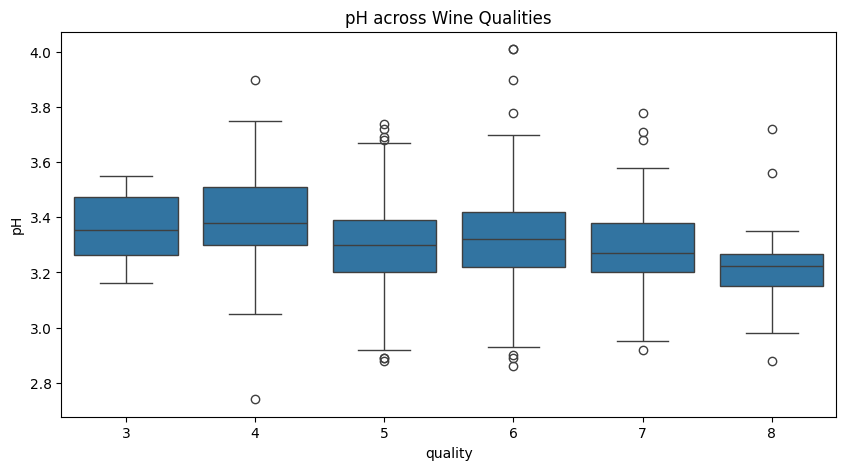

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='pH', data=wine) 
plt.title("pH across Wine Qualities")
plt.show()

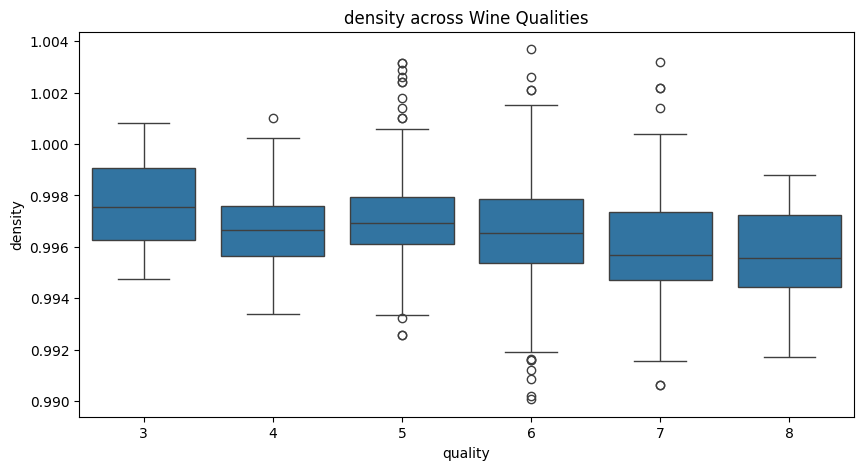

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='density', data=wine) 
plt.title("density across Wine Qualities")
plt.show()

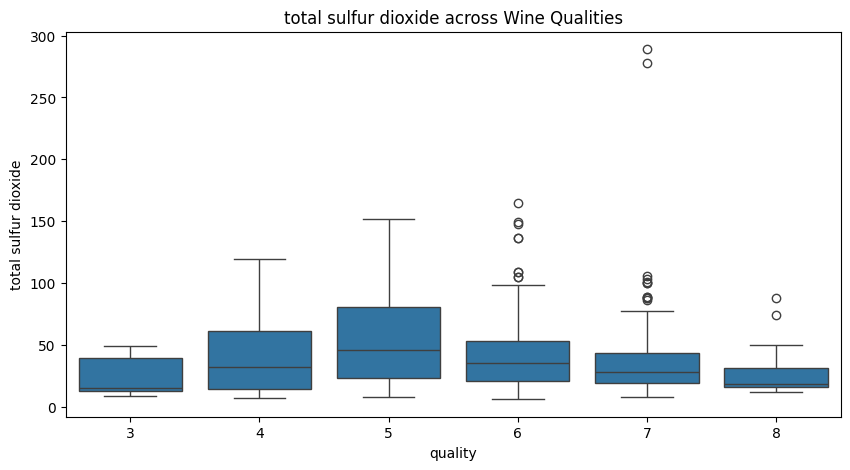

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='total sulfur dioxide', data=wine) 
plt.title("total sulfur dioxide across Wine Qualities")
plt.show()

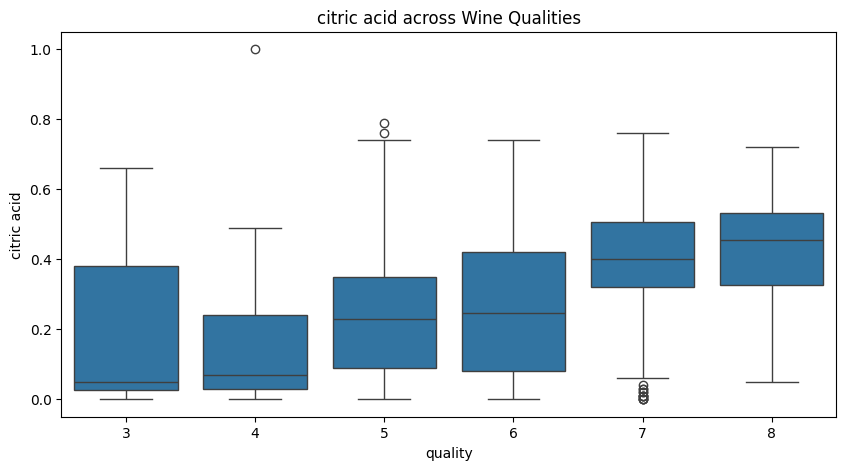

In [48]:
'citric acid'
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='citric acid', data=wine) 
plt.title("citric acid across Wine Qualities")
plt.show()

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

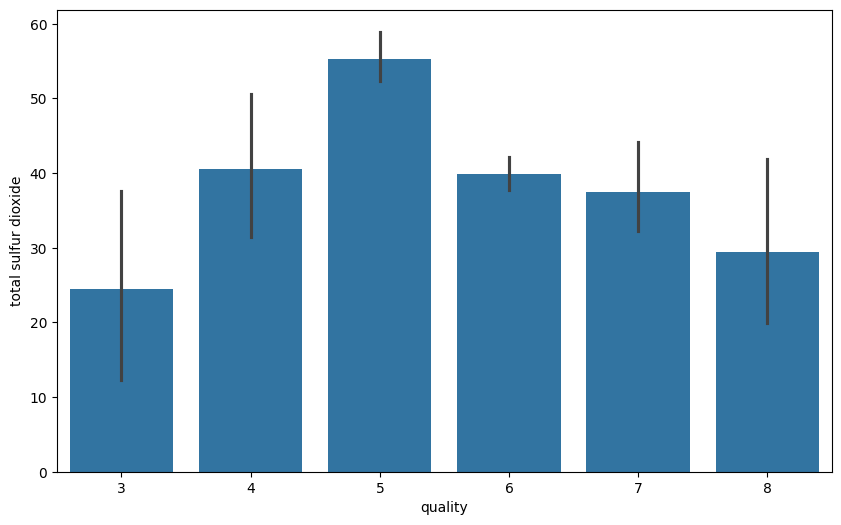

In [49]:
# Explore Total Sulfur Dioxide by quality categories using a bar plot

plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

In [ ]:
# Conclusions 

# Univariate:
# -  Most wines have alcohol content between 9% and 11%.
# -  The distribution of wine quality ratings appears to be somewhat skewed with 5 and 6 getting more reviews


# Multivariate:
# - There's a noticeable negative correlation between volatile acidity and quality. 
#   (higher volatile acidity suggests lower quality).
# -  There's some positive correlation between citric acid and quality, possibly weaker.
# - Alcohol seems to be somewhat positively correlated with quality
